<a href="https://colab.research.google.com/github/KamiraPagulayan/CCDATSCL_EXERCISES_COM221/blob/main/EXERCISE_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [35]:
df_exam_scores = pd.read_csv('exam_scores.csv')
df_exam_scores

,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [36]:
display(df_exam_scores['Method'].value_counts())

,count
Method,
A,17
B,17
C,16


Compute the mean and standard deviation of exam scores for each group.

In [37]:
grouped_scores = df_exam_scores.groupby('Method')['Score'].agg(['mean', 'std'])
display(grouped_scores)

,mean,std
Method,,
A,78.588235,2.575336
B,86.294118,2.365500
C,71.937500,1.768945


Use a plot to show the exam scores by teaching method.

/tmp/ipython-input-1410837859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Score', data=df_exam_scores, palette='viridis')


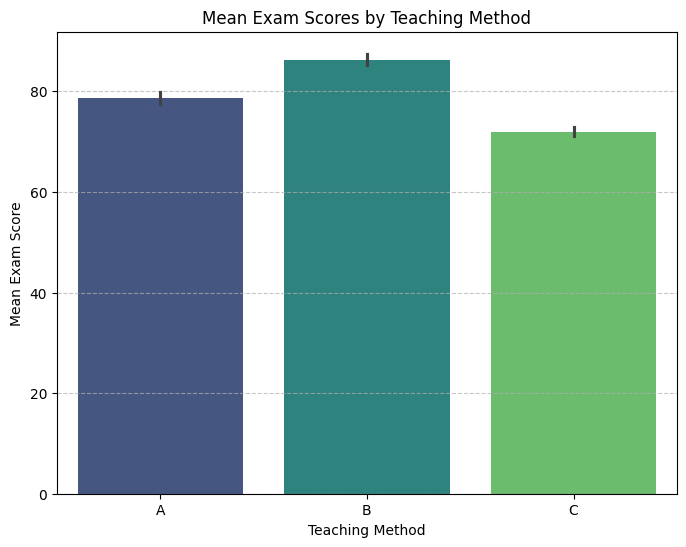

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Score', data=df_exam_scores, palette='viridis')
plt.title('Mean Exam Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Mean Exam Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [39]:
from scipy import stats

group_a = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
group_b = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
group_c = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha}), so we reject the null hypothesis. (Reject H0)")
else:
    print(f"The p-value ({p_value:.4f}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis. (Fail to reject H0)")

F-statistic: 165.1785
P-value: 0.0000
The p-value (0.0000) is less than the significance level (0.05), so we reject the null hypothesis. (Reject H0)


Null Hypothesis (H0): There is no difference in the mean exam scores among the three teaching methods. All group means are equal.
Alternative Hypothesis (Ha): At least one teaching method has a mean exam score that is different from the others.

Interpret the results. What does it say about the relationship between teaching method and exam scores?


> There is a statistically significant difference in the mean exam scores among the three teaching methods (A, B, and C).



## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [40]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [41]:
print("Counts for Gender:")
display(df_littering_data['Gender'].value_counts())

print("\nCounts for Litter:")
display(df_littering_data['Litter'].value_counts())

Counts for Gender:


,count
Gender,
Male,20
Female,20



Counts for Litter:


,count
Litter,
No,22
Yes,18


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [42]:
contingency_table = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'], margins=True)
display(contingency_table)

print("\nRow Totals:")
display(contingency_table.iloc[:, -1])

print("\nColumn Totals:")
display(contingency_table.iloc[-1, :-1])

print("\nGrand Total:")
display(contingency_table.iloc[-1, -1])

Litter,No,Yes,All
Gender,,,
Female,14,6,20
Male,8,12,20
All,22,18,40



Row Totals:


,All
Gender,
Female,20
Male,20
All,40



Column Totals:


,All
Litter,
No,22
Yes,18



Grand Total:


np.int64(40)

State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

Null Hypothesis (H0): There is no association between gender and littering behavior.

Alternative Hypothesis (Ha): There is an association between gender and littering behavior.

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [43]:
hi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {hi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

alpha = 0.05
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha}), so we reject the null hypothesis. (Reject H0)")
else:
    print(f"The p-value ({p_value:.4f}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis. (Fail to reject H0)")


Chi-square statistic: 3.6364
P-value: 0.4574
Degrees of freedom: 4
Expected frequencies table:
[[11.  9. 20.]
 [11.  9. 20.]
 [22. 18. 40.]]
The p-value (0.4574) is greater than the significance level (0.05), so we fail to reject the null hypothesis. (Fail to reject H0)


Interpret your results. Is there evidence that gender and littering behavior are associated?

- The results indicate no significant relationship between gender and littering behavior. Gender does not appear to influence the likelihood of a person engaging in littering based on the data analyzed.